## 데이터셋 구경

In [1]:
import pandas as pd

df=pd.read_csv('data/metadata_with_Nan.csv')

filter = df[df['Shape_Feature'].isin(['C '])]

filter

,Name,Upper,Category,Shape_Feature,Description
12,BL-001,T,BL,C,스카이 블루 페일 톤 단색
29,BL-002,T,BL,C,아이보리 단색
51,BL-003,T,BL,C,화이트 단색
74,BL-004,T,BL,C,화이트 단색
92,BL-005,T,BL,C,화이트 단색
...,...,...,...,...,...
116967,VT-272,O,VT,C,아이보리 단색
116968,VT-272,O,VT,C,상의 가슴 부분 왼쪽 브라운 대비 색 포인트 배색
116969,VT-272,O,VT,C,상의 암홀 부분 브라운 대비 색 포인트 배색
116970,VT-272,O,VT,C,상의 앞 중심선 부분 오른쪽 브라운 대비 색 포인트 배색


## Feature Extraction - Clustering

In [2]:
import pandas as pd
from torch.utils.data import DataLoader

df=pd.read_csv('data/metadata_with_Nan.csv')
names = set(list(df['Name']))
names = pd.DataFrame(names, columns=['Name'])

In [3]:
from tools.Fashiondataset import FashionDataset

image_folder = 'data/img_jpg'
Dataset=FashionDataset(dataframe=names, image_folder=image_folder)
Dataloader=DataLoader(Dataset, batch_size=16, shuffle=False)

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
from tools.ExtractFeature import extract_features_from_images, get_features
from tools.clustering import perform_clustering_with_cache

사용하는 장치: cuda


In [86]:
user_name='default'
model = 'deit' # ['resnet', 'vit', 'dino', 'deit']
no_clusters=16
force_ex = False
#for i in ['resnet', 'vit', 'dino', 'deit']:
    #features = get_features(user_name, i, Dataloader, force_extract=force_ex)
features = get_features(user_name, model, Dataloader, force_extract=force_ex)



deit extracted feature load from saved/default_features_deit.npy.


## Bagging

In [ ]:
dic={}
for i in ['resnet', 'vit', 'dino', 'deit']:
    temp=[]
    for j in range(5):
        temp.append(get_features(user_name+f'{j}', i, Dataloader, force_extract=True))

    dic[i]=temp

c:\Users\user\anaconda3\envs\general2\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\anaconda3\envs\general2\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
특징 추출: 100%|██████████| 450/450 [00:35<00:00, 12.74it/s]


resnet extracted feature saved to saved/default0_features_resnet.npy.


특징 추출: 100%|██████████| 450/450 [00:34<00:00, 13.20it/s]


resnet extracted feature saved to saved/default1_features_resnet.npy.


특징 추출: 100%|██████████| 450/450 [00:33<00:00, 13.28it/s]


resnet extracted feature saved to saved/default2_features_resnet.npy.


특징 추출: 100%|██████████| 450/450 [00:34<00:00, 13.00it/s]


resnet extracted feature saved to saved/default3_features_resnet.npy.


특징 추출: 100%|██████████| 450/450 [00:35<00:00, 12.85it/s]


resnet extracted feature saved to saved/default4_features_resnet.npy.


특징 추출: 100%|██████████| 450/450 [00:53<00:00,  8.47it/s]


vit extracted feature saved to saved/default0_features_vit.npy.


특징 추출: 100%|██████████| 450/450 [00:54<00:00,  8.29it/s]


vit extracted feature saved to saved/default1_features_vit.npy.


특징 추출: 100%|██████████| 450/450 [00:56<00:00,  7.98it/s]


vit extracted feature saved to saved/default2_features_vit.npy.


특징 추출: 100%|██████████| 450/450 [00:58<00:00,  7.68it/s]


vit extracted feature saved to saved/default3_features_vit.npy.


특징 추출: 100%|██████████| 450/450 [00:58<00:00,  7.64it/s]


vit extracted feature saved to saved/default4_features_vit.npy.


Using cache found in C:\Users\user/.cache\torch\hub\facebookresearch_dinov2_main
특징 추출: 100%|██████████| 450/450 [02:43<00:00,  2.75it/s]


dino extracted feature saved to saved/default0_features_dino.npy.


Using cache found in C:\Users\user/.cache\torch\hub\facebookresearch_dinov2_main
특징 추출: 100%|██████████| 450/450 [02:44<00:00,  2.73it/s]


dino extracted feature saved to saved/default1_features_dino.npy.


Using cache found in C:\Users\user/.cache\torch\hub\facebookresearch_dinov2_main
특징 추출: 100%|██████████| 450/450 [02:44<00:00,  2.73it/s]


dino extracted feature saved to saved/default2_features_dino.npy.


Using cache found in C:\Users\user/.cache\torch\hub\facebookresearch_dinov2_main
특징 추출: 100%|██████████| 450/450 [02:42<00:00,  2.77it/s]


dino extracted feature saved to saved/default3_features_dino.npy.


Using cache found in C:\Users\user/.cache\torch\hub\facebookresearch_dinov2_main
특징 추출: 100%|██████████| 450/450 [02:45<00:00,  2.72it/s]


dino extracted feature saved to saved/default4_features_dino.npy.


특징 추출: 100%|██████████| 450/450 [00:37<00:00, 11.97it/s]


deit extracted feature saved to saved/default0_features_deit.npy.


특징 추출: 100%|██████████| 450/450 [00:37<00:00, 12.04it/s]


deit extracted feature saved to saved/default1_features_deit.npy.


특징 추출: 100%|██████████| 450/450 [00:37<00:00, 12.12it/s]


deit extracted feature saved to saved/default2_features_deit.npy.


특징 추출: 100%|██████████| 450/450 [00:37<00:00, 11.99it/s]


deit extracted feature saved to saved/default3_features_deit.npy.


특징 추출: 100%|██████████| 450/450 [00:37<00:00, 12.02it/s]

deit extracted feature saved to saved/default4_features_deit.npy.


In [19]:
import numpy as np

for i in ['resnet', 'vit', 'dino', 'deit']:
    bagged_features = sum(dic[i])/5
    np.save(f'saved/{user_name}_bagged_{i}_feature.npy',bagged_features)
    print('done')

done
done
done
done


In [87]:
features = np.load('saved/default_bagged_deit_feature.npy')

## Attention based Variational Autoencoder

In [123]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
from torch.cuda.amp import autocast, GradScaler

class FeatureProcessor:
    def __init__(self):
        self.scalers = []
        
    def normalize_and_concatenate(self, feature_vectors):
        normalized_vectors = []
        
        for vector in feature_vectors:
            scaler = StandardScaler()
            normalized = scaler.fit_transform(vector)
            self.scalers.append(scaler)
            normalized_vectors.append(normalized)
        
        return np.concatenate(normalized_vectors, axis=1)

class ResidualBlock(nn.Module):
    def __init__(self, in_features):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Linear(in_features, in_features),
            nn.BatchNorm1d(in_features),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(in_features, in_features),
            nn.BatchNorm1d(in_features)
        )
        
    def forward(self, x):
        return F.relu(x + self.block(x))

def loss_function(recon_x, x, mu, log_var, kld_weight):
    # Use mean reduction instead of sum
    reconstruction_loss = F.mse_loss(recon_x, x, reduction='mean')
    
    # Normalized KLD loss
    kld_loss = -0.5 * torch.mean(1 + log_var - mu.pow(2) - log_var.exp())
    
    return reconstruction_loss + kld_weight * kld_loss, reconstruction_loss, kld_loss

class WarmUpScheduler(torch.optim.lr_scheduler._LRScheduler):
    def __init__(self, optimizer, warmup_epochs, total_epochs):
        self.warmup_epochs = warmup_epochs
        self.total_epochs = total_epochs
        super(WarmUpScheduler, self).__init__(optimizer)

    def get_lr(self):
        if self.last_epoch < self.warmup_epochs:
            return [base_lr * (self.last_epoch + 1) / self.warmup_epochs 
                    for base_lr in self.base_lrs]
        return [base_lr * (1 - (self.last_epoch - self.warmup_epochs) / 
                (self.total_epochs - self.warmup_epochs))
                for base_lr in self.base_lrs]

class GroupedLinearAttention(nn.Module):
    def __init__(self, feature_dim, group_size=64):
        super().__init__()
        self.group_size = group_size
        self.num_groups = feature_dim // group_size
        if feature_dim % group_size != 0:
            self.num_groups += 1
        
        # Initialize with normal distribution
        self.feature_weights = nn.Parameter(torch.randn(feature_dim) * 0.02)
        
        # Separate projections for each group
        self.group_projections = nn.ModuleList([
            nn.Sequential(
                nn.Linear(group_size, group_size // 2),
                nn.ReLU(),
                nn.Linear(group_size // 2, group_size)
            ) for _ in range(self.num_groups)
        ])
        
        # Global feature context
        self.global_context = nn.Sequential(
            nn.Linear(feature_dim, 512),
            nn.ReLU(),
            nn.Linear(512, feature_dim)
        )
        
    def forward(self, x):
        batch_size = x.size(0)
        original_size = x.size(1)
        
        # Apply global context
        global_weights = torch.sigmoid(self.global_context(x))
        x = x * global_weights
        
        # Pad if necessary
        padded_len = self.num_groups * self.group_size
        if padded_len > original_size:
            padding = torch.zeros(batch_size, padded_len - original_size, device=x.device)
            x = torch.cat([x, padding], dim=1)
        
        # Process each group
        grouped_output = []
        for i in range(self.num_groups):
            start_idx = i * self.group_size
            end_idx = start_idx + self.group_size
            group = x[:, start_idx:end_idx]
            
            # Apply group-specific attention
            group_weights = F.softmax(self.feature_weights[start_idx:end_idx], dim=0)
            weighted_group = group * group_weights
            
            # Apply group transformation
            transformed_group = self.group_projections[i](weighted_group)
            grouped_output.append(transformed_group)
        
        # Concatenate results
        output = torch.cat(grouped_output, dim=1)
        
        # Return only original size
        return output[:, :original_size]
    
    def get_feature_importance(self):
        # Apply softmax per group to get more distinct importance values
        importances = []
        for i in range(self.num_groups):
            start_idx = i * self.group_size
            end_idx = start_idx + self.group_size
            group_weights = F.softmax(self.feature_weights[start_idx:end_idx], dim=0)
            importances.append(group_weights)
        return torch.cat(importances)

class AttentionVAE(nn.Module):
    def __init__(self, input_dim, encoding_dim=1024, group_size=64):
        super().__init__()
        
        self.attention = GroupedLinearAttention(input_dim, group_size)
        
        # Revised encoder architecture
        self.encoder_layers = nn.ModuleList([
            # First layer: input_dim -> 3072
            nn.Sequential(
                nn.Linear(input_dim, 3072),
                nn.LayerNorm(3072),
                nn.ReLU(),
                nn.Dropout(0.2)
            ),
            # Second layer: 3072 -> 3072 (residual)
            nn.Sequential(
                nn.Linear(3072, 3072),
                nn.LayerNorm(3072),
                nn.ReLU(),
                nn.Dropout(0.2)
            ),
            # Third layer: 3072 -> 2048
            nn.Sequential(
                nn.Linear(3072, 2048),
                nn.LayerNorm(2048),
                nn.ReLU(),
                nn.Dropout(0.2)
            )
        ])
        
        # Feature projections for residual connections
        self.input_projection = nn.Linear(input_dim, 3072)
        
        # VAE specific layers
        self.fc_mu = nn.Linear(2048, encoding_dim)
        self.fc_var = nn.Linear(2048, encoding_dim)
        
        # Revised decoder architecture
        self.decoder = nn.ModuleList([
            # First layer: encoding_dim -> 2048
            nn.Sequential(
                nn.Linear(encoding_dim, 2048),
                nn.LayerNorm(2048),
                nn.ReLU(),
                nn.Dropout(0.2)
            ),
            # Second layer: 2048 -> 3072
            nn.Sequential(
                nn.Linear(2048, 3072),
                nn.LayerNorm(3072),
                nn.ReLU(),
                nn.Dropout(0.2)
            ),
            # Third layer: 3072 -> 3072 (residual)
            nn.Sequential(
                nn.Linear(3072, 3072),
                nn.LayerNorm(3072),
                nn.ReLU(),
                nn.Dropout(0.2)
            ),
            # Output layer: 3072 -> input_dim
            nn.Linear(3072, input_dim)
        ])
        
        # Initialize weights
        self.apply(self._init_weights)
    
    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight)
            if m.bias is not None:
                nn.init.zeros_(m.bias)
    
    def encode(self, x):
        # Apply attention
        x = self.attention(x)
        
        # Project input for residual connection
        identity = self.input_projection(x)
        
        # Apply encoder layers
        for i, layer in enumerate(self.encoder_layers):
            x = layer(x)
            if i == 1:  # Add residual connection after second layer
                x = x + identity
        
        return self.fc_mu(x), self.fc_var(x)
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        # Apply decoder layers with residual connections
        for i, layer in enumerate(self.decoder[:-1]):  # Exclude final layer
            z = layer(z)
            if i == 2:  # Add residual connection at the third layer
                identity = z
                z = z + identity
        
        return self.decoder[-1](z)
    
    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        return self.decode(z), mu, log_var
    
def train_attention_vae(model, train_loader, num_epochs, learning_rate, device):
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
    scaler = GradScaler()
    
    best_loss = float('inf')
    patience = 10
    patience_counter = 0
    
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        total_recon_loss = 0
        total_kld_loss = 0
        
        for batch_idx, data in enumerate(train_loader):
            inputs = data[0].to(device)
            
            # Adaptive KLD weight
            kld_weight = min(1.0, (epoch * len(train_loader) + batch_idx) / 
                           (10 * len(train_loader)))
            
            # 수정된 autocast 사용
            with autocast():
                reconstructed, mu, log_var = model(inputs)
                loss, recon_loss, kld_loss = loss_function(
                    reconstructed, inputs, mu, log_var, kld_weight)
            
            optimizer.zero_grad()
            scaler.scale(loss).backward()
            
            # Gradient clipping
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            scaler.step(optimizer)
            scaler.update()
            
            total_loss += loss.item()
            total_recon_loss += recon_loss.item()
            total_kld_loss += kld_loss.item()
        
        scheduler.step()
        
        # Calculate average losses
        avg_loss = total_loss / len(train_loader)
        avg_recon_loss = total_recon_loss / len(train_loader)
        avg_kld_loss = total_kld_loss / len(train_loader)
        
        # Early stopping check
        if avg_loss < best_loss:
            best_loss = avg_loss
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break
        
        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}]')
            print(f'Average Loss: {avg_loss:.4f}')
            print(f'Reconstruction Loss: {avg_recon_loss:.4f}')
            print(f'KLD Loss: {avg_kld_loss:.4f}')
            
            # Get and print feature importance distribution
            importance = model.attention.get_feature_importance()
            sorted_importance, indices = torch.sort(importance, descending=True)
            
            print("\nTop 10 most important features:")
            for idx, value in zip(indices[:10], sorted_importance[:10]):
                print(f"Feature {idx.item()}: {value.item():.4f}")

In [124]:
torch.manual_seed(42)
np.random.seed(42)

# 데이터 준비
vector1 = np.load('saved/default_bagged_resnet_feature.npy')
vector2 = np.load('saved/default_bagged_vit_feature.npy')
vector3 = np.load('saved/default_bagged_dino_feature.npy')
vector4 = np.load('saved/default_bagged_deit_feature.npy')

processor = FeatureProcessor()
concatenated_features = processor.normalize_and_concatenate([vector1, vector2, vector3, vector4])

data_tensor = torch.FloatTensor(concatenated_features)
dataset = TensorDataset(data_tensor)
batch_size = 64  # Reduced batch size for better stability
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 모델 초기화
input_dim = concatenated_features.shape[1]
encoding_dim = 1024
group_size = 128  # Increased group size
model = AttentionVAE(input_dim, encoding_dim, group_size).to(device)

# 학습 파라미터
num_epochs = 100
learning_rate = 0.001

# 모델 학습
train_attention_vae(model, train_loader, num_epochs, learning_rate, device)

Using device: cuda


C:\Users\user\AppData\Local\Temp\ipykernel_256792\1133657211.py:247: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
C:\Users\user\AppData\Local\Temp\ipykernel_256792\1133657211.py:267: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch [5/100]
Average Loss: 0.8394
Reconstruction Loss: 0.8265
KLD Loss: 0.0287

Top 10 most important features:
Feature 3385: 0.0093
Feature 3714: 0.0092
Feature 5063: 0.0092
Feature 3554: 0.0092
Feature 2625: 0.0092
Feature 5336: 0.0092
Feature 1049: 0.0091
Feature 2118: 0.0091
Feature 3786: 0.0091
Feature 691: 0.0090
Epoch [10/100]
Average Loss: 0.7757
Reconstruction Loss: 0.7526
KLD Loss: 0.0243

Top 10 most important features:
Feature 3592: 0.0101
Feature 1049: 0.0097
Feature 3720: 0.0097
Feature 2625: 0.0096
Feature 2299: 0.0096
Feature 3554: 0.0096
Feature 3405: 0.0095
Feature 1938: 0.0095
Feature 3846: 0.0095
Feature 3871: 0.0095
Epoch [15/100]
Average Loss: 0.7404
Reconstruction Loss: 0.7142
KLD Loss: 0.0262

Top 10 most important features:
Feature 3592: 0.0106
Feature 2752: 0.0104
Feature 5313: 0.0102
Feature 3792: 0.0101
Feature 1006: 0.0101
Feature 5258: 0.0101
Feature 1369: 0.0101
Feature 2402: 0.0101
Feature 1042: 0.0100
Feature 3405: 0.0100
Epoch [20/100]
Average Loss: 0


Reconstruction Quality Analysis:
Overall MSE: 0.4910

Best Reconstructed Features:
Feature 1601: MSE = 0.1371
Feature 3854: MSE = 0.1431
Feature 325: MSE = 0.1437
Feature 3122: MSE = 0.1536
Feature 1956: MSE = 0.1744
Feature 3777: MSE = 0.1785
Feature 3988: MSE = 0.1808
Feature 4574: MSE = 0.1828
Feature 1768: MSE = 0.1880
Feature 1747: MSE = 0.1906

Worst Reconstructed Features:
Feature 2364: MSE = 0.7309
Feature 2230: MSE = 0.7331
Feature 610: MSE = 0.7373
Feature 2858: MSE = 0.7404
Feature 5267: MSE = 0.7428
Feature 1283: MSE = 0.7531
Feature 5036: MSE = 0.7583
Feature 22: MSE = 0.7598
Feature 440: MSE = 0.7621
Feature 1022: MSE = 0.8140


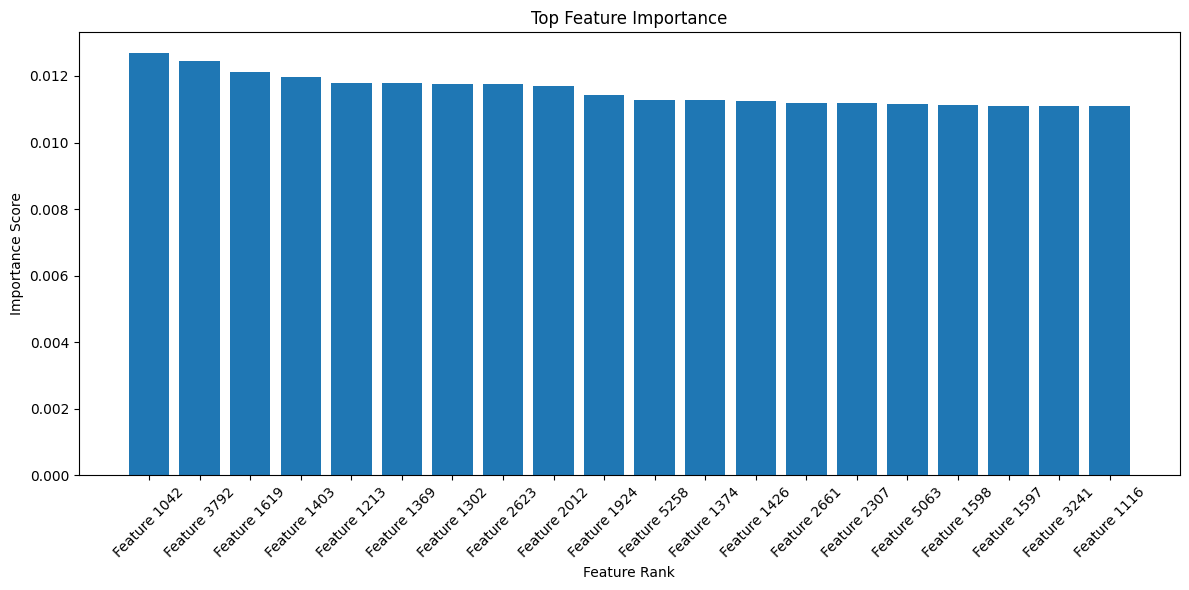


Encoded feature shape: (7197, 1024)
Reconstructed data shape: (7197, 5376)


In [125]:
def predict(model, input_vectors, processor, device, batch_size=64):
    """
    새로운 데이터에 대한 예측 수행
    
    Parameters:
    - model: 학습된 VAE 모델
    - input_vectors: list of numpy arrays [vector1, vector2, vector3, vector4]
    - processor: 학습에 사용된 FeatureProcessor 인스턴스
    - device: 'cuda' or 'cpu'
    - batch_size: 배치 크기
    
    Returns:
    - reconstructed_data: 재구성된 데이터
    - encoded_features: 인코딩된 특징
    - feature_importance: 각 특징의 중요도
    """
    model.eval()  # 평가 모드로 설정
    
    # 입력 데이터 전처리
    concatenated_features = processor.normalize_and_concatenate(input_vectors)
    data_tensor = torch.FloatTensor(concatenated_features)
    dataset = TensorDataset(data_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size)
    
    reconstructed_chunks = []
    encoded_chunks = []
    feature_importance = None
    
    with torch.no_grad():  # 그래디언트 계산 비활성화
        for batch in dataloader:
            inputs = batch[0].to(device)
            
            # 모델 통과
            reconstructed, mu, _ = model(inputs)
            
            # 결과 저장
            reconstructed_chunks.append(reconstructed.cpu().numpy())
            encoded_chunks.append(mu.cpu().numpy())
        
        # Feature importance 계산
        feature_importance = model.attention.get_feature_importance().cpu().numpy()
    
    # 결과 합치기
    reconstructed_data = np.concatenate(reconstructed_chunks, axis=0)
    encoded_features = np.concatenate(encoded_chunks, axis=0)
    
    return reconstructed_data, encoded_features, feature_importance

def analyze_reconstruction_quality(original_data, reconstructed_data):
    """
    재구성 품질 분석
    """
    # MSE 계산
    mse = np.mean((original_data - reconstructed_data) ** 2)
    
    # Feature별 MSE 계산
    feature_mse = np.mean((original_data - reconstructed_data) ** 2, axis=0)
    
    # 상위/하위 10개 feature의 재구성 품질
    worst_features = np.argsort(feature_mse)[-10:]
    best_features = np.argsort(feature_mse)[:10]
    
    print("\nReconstruction Quality Analysis:")
    print(f"Overall MSE: {mse:.4f}")
    
    print("\nBest Reconstructed Features:")
    for idx in best_features:
        print(f"Feature {idx}: MSE = {feature_mse[idx]:.4f}")
    
    print("\nWorst Reconstructed Features:")
    for idx in worst_features:
        print(f"Feature {idx}: MSE = {feature_mse[idx]:.4f}")
    
    return mse, feature_mse

def visualize_feature_importance(feature_importance, top_k=20):
    """
    Feature importance 시각화
    """
    import matplotlib.pyplot as plt
    
    # Top-k 중요 특징 선택
    top_indices = np.argsort(feature_importance)[-top_k:]
    top_importance = feature_importance[top_indices]
    
    # 시각화
    plt.figure(figsize=(12, 6))
    plt.bar(range(top_k), top_importance[::-1])
    plt.title('Top Feature Importance')
    plt.xlabel('Feature Rank')
    plt.ylabel('Importance Score')
    plt.xticks(range(top_k), [f'Feature {idx}' for idx in top_indices[::-1]], rotation=45)
    plt.tight_layout()
    plt.show()

# 사용 예시:
def predict_example():
    # 모델과 프로세서 로드 (이미 학습된 상태라고 가정)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # 새로운 데이터 준비 (예시)
    vector1 = np.load('saved/default_bagged_resnet_feature.npy')
    vector2 = np.load('saved/default_bagged_vit_feature.npy')
    vector3 = np.load('saved/default_bagged_dino_feature.npy')
    vector4 = np.load('saved/default_bagged_deit_feature.npy')
    
    # 예측 수행
    reconstructed_data, encoded_features, feature_importance = predict(
        model, 
        [vector1, vector2, vector3, vector4],
        processor,
        device
    )
    
    # 원본 데이터 준비 (concatenated)
    original_data = processor.normalize_and_concatenate(
        [vector1, vector2, vector3, vector4]
    )
    
    # 재구성 품질 분석
    mse, feature_mse = analyze_reconstruction_quality(original_data, reconstructed_data)
    
    # Feature importance 시각화
    visualize_feature_importance(feature_importance)
    
    print(f"\nEncoded feature shape: {encoded_features.shape}")
    print(f"Reconstructed data shape: {reconstructed_data.shape}")
    
    return reconstructed_data, encoded_features, feature_importance

reconstructed_data, encoded_features, importance = predict_example()

In [132]:
encoded_model = model

In [133]:
labels = perform_clustering_with_cache(user_name+'encode', encoded_features, model_type='VAE', n_clusters=no_clusters, force_cluster=True)[0]

K-means 클러스터링 수행 중...
defaultencode clustered labels were saved to saved/defaultencode_labels_VAE_16clusters.npy.
모델이 저장되었습니다: saved/defaultencode_VAE_16clusters_model.pkl


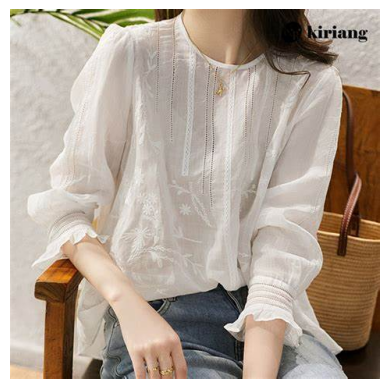

In [134]:
img_path = 'data/preference/BL-test1.jpg'
image = Image.open(img_path).convert('RGB')
plt.imshow(image)
plt.axis('off') 
plt.show()

In [135]:
from tools.Extractor import FeatureExtractor
import torch
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_features = extract_features_from_images([img_path], FeatureExtractor(model_type='deit').to(device), device, transform=True)
print(features.shape)
print(image_features.shape)
warnings.resetwarnings()

Feature extraction: 100%|██████████| 1/1 [00:00<00:00, 20.55it/s]

(7197, 768)
(1, 768)


## Category classification

In [136]:
labels, kmeans = perform_clustering_with_cache(user_name, encoded_features, model_type='deit', n_clusters=no_clusters)  
print("Labels loaded:", labels is not None)
print("Model loaded:", kmeans is not None)

if kmeans is not None:
    predicted_cluster = kmeans.predict(image_features)[0]
    print(f"이 이미지는 군집 {predicted_cluster}에 속합니다")
else:
    print("모델이 로드되지 않았습니다. force_cluster=True로 다시 시도합니다.")
    labels, kmeans = perform_clustering_with_cache(user_name, features, model_type=model, n_clusters=no_clusters, force_cluster=True)
    predicted_cluster = kmeans.predict(image_features)[0]
    print(f"이 이미지는 군집 {predicted_cluster}에 속합니다")

default clustered labels were load from saved/default_labels_deit_16clusters.npy.
모델을 불러왔습니다: saved/default_deit_16clusters_model.pkl
Labels loaded: True
Model loaded: True
이 이미지는 군집 6에 속합니다


군집 6에 속한 이미지들:
Image name: CT-454
Image name: SK-324
Image name: JK-323
Image name: SH-034
Image name: BL-178


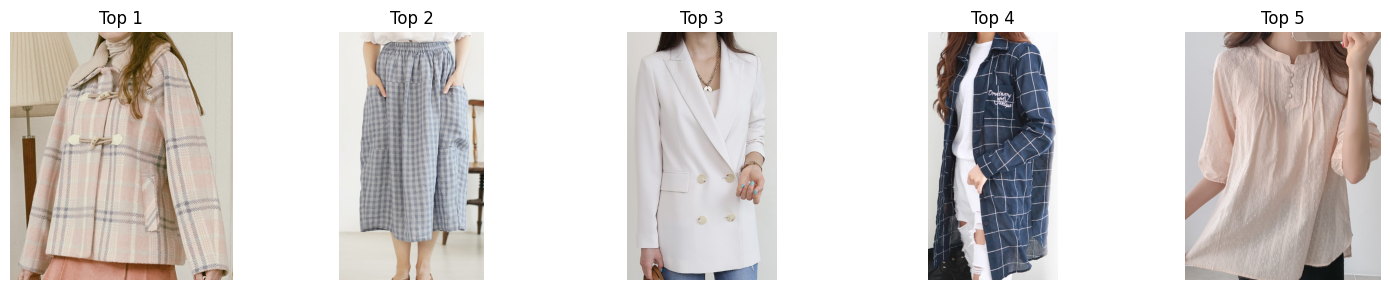

In [137]:
import numpy as np
from tools.clustering import show_cluster_images

show_cluster_images(Dataset, labels, cluster_num=predicted_cluster, num_samples=5)

In [138]:
from tools.clustering import get_cluster_categories
category_mapping = {'JK': 'Jacket', 'CT': 'Coat', 'JP': 'Jumper', 'KN': 'Knit', 'SW': 'Sweater', 'SH': 'Shirt', 'BL': 'Blouse', 'CD': 'Cardigan', 'VT': 'Vest', 'OP': 'One Piece', 'SK': 'Skirt', 'PT': 'Pants', 'SE': 'Shoes', 'BG': 'Bag', 'SC': 'Scarf', 'HC': 'Hat & Cap'}

cluster_categories = get_cluster_categories(Dataset, kmeans, features, labels)
cluster_names = {k: category_mapping.get(v, 'Unknown') for k, v in cluster_categories.items()}
print(cluster_names)

{np.int32(0): 'Skirt', np.int32(1): 'Coat', np.int32(2): 'Pants', np.int32(3): 'Shoes', np.int32(4): 'One Piece', np.int32(5): 'Scarf', np.int32(6): 'Shirt', np.int32(7): 'Sweater', np.int32(8): 'Hat & Cap', np.int32(9): 'Coat', np.int32(10): 'Jumper', np.int32(11): 'Bag', np.int32(12): 'One Piece', np.int32(13): 'Bag', np.int32(14): 'Hat & Cap', np.int32(15): 'Shirt'}


## Similarity check

In [ ]:
from tools.similarity2 import Similarity
sim = Similarity(
    feature_vectors=encoded_features,
    dataset=Dataset,
    user_name=user_name,
    user_vector=image_features,
    model_type='deit',
    force_new=False
)

Saved index and vectors for user default
Saved new features for default


In [143]:
a=sim.get_sim(image_features, k=10)
percentages, recommendation = sim.attractiveness(image_features, return_percentage=True, custom_threshold=88)

print("\n추천 결과:")
print(recommendation)

print("\n상위 5개 아이템 유사도:")
for i, percent in enumerate(percentages[0][:5], 1):
    print(f"{i}번째 아이템: {percent}%")
Dataset.show_images(a)

AssertionError: 

## Check clustering

In [41]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

def visualize_in_3d_with_scree_plot(features, labels):
    pca_full = PCA().fit(features)
    explained_variance = pca_full.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
    n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1
    n_components_70 = np.argmax(cumulative_variance >= 0.7) + 1
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.grid()
    
    plt.axvline(x=n_components_90, color='red', linestyle='--', label=f'90% Variance at PC {n_components_90}')
    plt.axvline(x=n_components_80, color='green', linestyle='--', label=f'80% Variance at PC {n_components_80}')
    plt.axvline(x=n_components_70, color='blue', linestyle='--', label=f'70% Variance at PC {n_components_70}')
    plt.legend()
    plt.show()
    
    pca = PCA(n_components=3)
    features_3d = pca.fit_transform(features)
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(features_3d[:, 0], features_3d[:, 1], features_3d[:, 2], 
                         c=labels, cmap='tab20c', s=15)
    
    ax.set_title('Clustered Feature 3D Visualization')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    
    legend = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend)
    
    plt.show()

def find_optimal_clusters(features, max_clusters=30, plot=True):
    inertias = []
    K = range(10, max_clusters + 1)
    
    for k in K:
        print(f"Testing k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features)
        inertias.append(kmeans.inertia_)
    
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(K, inertias, 'bx-')
        plt.xlabel('k')
        plt.ylabel('Inertia')
        plt.title('Elbow Method for Optimal k')
        plt.grid(True)
        plt.show()
    
    kn = KneeLocator(
        K, 
        inertias,
        curve='convex',
        direction='decreasing'
    )
    optimal_k = kn.elbow
    
    print(f"최적의 클러스터 수: {optimal_k}")
    return optimal_k

### Elbow point

Testing k=10
Testing k=11
Testing k=12
Testing k=13
Testing k=14
Testing k=15
Testing k=16
Testing k=17
Testing k=18
Testing k=19
Testing k=20
Testing k=21
Testing k=22
Testing k=23
Testing k=24
Testing k=25
Testing k=26
Testing k=27
Testing k=28
Testing k=29
Testing k=30


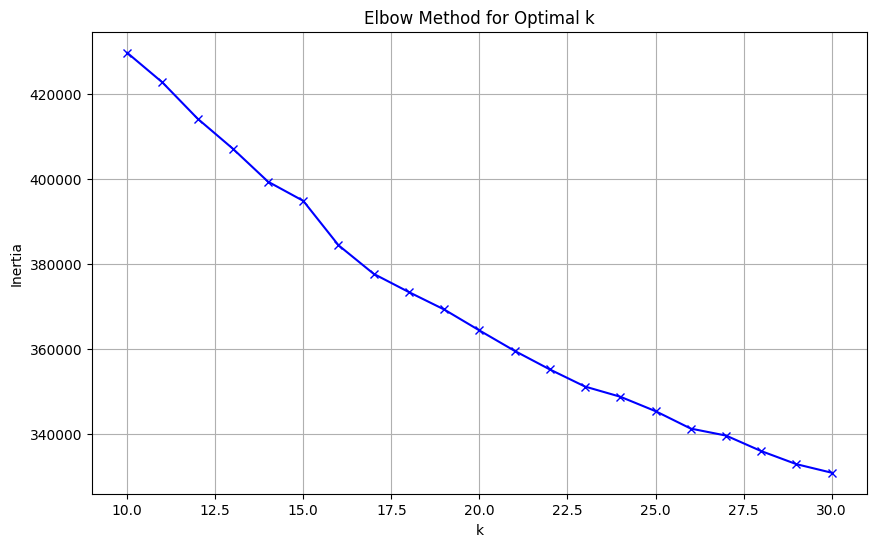

최적의 클러스터 수: 17


In [126]:
optimal_k = find_optimal_clusters(encoded_features)

### Scree plot with PCA analysis

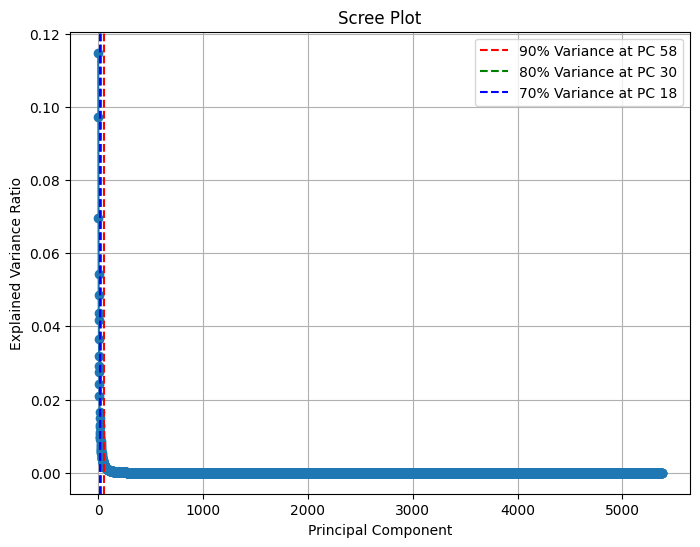

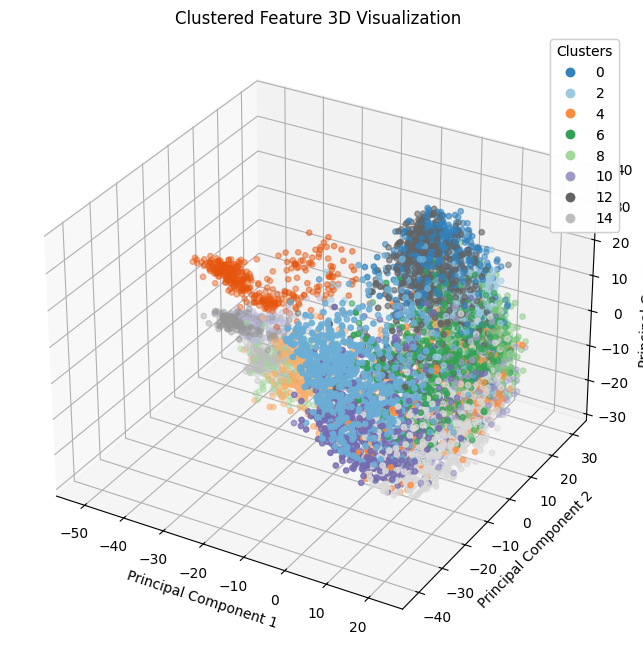

In [144]:
visualize_in_3d_with_scree_plot(reconstructed_data,labels)

## Recommend coordination

In [104]:
import os
from pathlib import Path

def get_image_paths(folder_path, recursive=False):
    IMAGE_EXTENSIONS = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.webp')
    
    image_paths = []
    
    folder = Path(folder_path)
    
    if not folder.exists():
        raise FileNotFoundError(f"폴더를 찾을 수 없습니다: {folder_path}")
    
    pattern = "**/*" if recursive else "*"
    
    for file_path in folder.glob(pattern):
        if file_path.is_file() and file_path.suffix.lower() in IMAGE_EXTENSIONS:
            image_paths.append(str(file_path))
    
    return sorted(image_paths) 

In [105]:
warnings.filterwarnings('ignore', category=UserWarning)
img_path = get_image_paths("data/Maje")
features = get_features(user_name, model, Dataloader, force_extract=False)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
maje_features = extract_features_from_images(img_path, FeatureExtractor(model_type=model).to(device), device, transform=True)

warnings.resetwarnings()

deit extracted feature load from saved/default_features_deit.npy.


Feature extraction: 100%|██████████| 18/18 [00:00<00:00, 38.60it/s]


In [107]:
labels, kmeans = perform_clustering_with_cache(user_name, features, model_type=model, n_clusters=no_clusters)
print("Labels loaded:", labels is not None)
print("Model loaded:", kmeans is not None)



predicted_cluster = kmeans.predict(maje_features)
pred_label=[]
print(img_path)
print(predicted_cluster)
for i in predicted_cluster:
    pred_label.append(cluster_names[i])
print(pred_label)

default clustered labels were load from saved/default_labels_deit_16clusters.npy.
모델을 불러왔습니다: saved/default_deit_16clusters_model.pkl
Labels loaded: True
Model loaded: True
['data\\Maje\\1-1.jpg', 'data\\Maje\\1-2.jpg', 'data\\Maje\\1-3.jpg', 'data\\Maje\\1-4.jpg', 'data\\Maje\\2-1.jpg', 'data\\Maje\\2-2.jpg', 'data\\Maje\\2-5.jpg', 'data\\Maje\\3-1.jpg', 'data\\Maje\\3-2.jpg', 'data\\Maje\\3-4.jpg', 'data\\Maje\\4-1.jpg', 'data\\Maje\\4-2.jpg', 'data\\Maje\\4-4.jpg', 'data\\Maje\\5-1.jpg', 'data\\Maje\\5-2.jpg', 'data\\Maje\\5-4.jpg', 'data\\Maje\\6-1.jpg', 'data\\Maje\\6-4.jpg']
[ 6  0  2  3  7  0 11 15 15  3 15 15  3 15  6  3  0  3]
['Shirt', 'Skirt', 'Pants', 'Shoes', 'Sweater', 'Skirt', 'Bag', 'Shirt', 'Shirt', 'Shoes', 'Shirt', 'Shirt', 'Shoes', 'Shirt', 'Shirt', 'Shoes', 'Skirt', 'Shoes']


In [32]:
import pandas as pd
import os
import numpy as np

def debug_style_items(image_paths, predicted_labels):
    """
    각 스타일 번호별 이미지 파일명과 예측된 라벨을 출력합니다.
    """
    style_details = {}
    
    for path, label in zip(image_paths, predicted_labels):
        filename = os.path.basename(path)
        style_number = int(filename.split('-')[0])
        
        if style_number not in style_details:
            style_details[style_number] = []
            
        style_details[style_number].append({
            'filename': filename,
            'predicted_label': label
        })
    
    print("\n=== 스타일별 상세 정보 ===")
    for style, details in sorted(style_details.items()):
        print(f"\n스타일 {style}:")
        print(f"총 이미지 개수: {len(details)}")
        print("이미지 목록:")
        for item in details:
            print(f"  파일명: {item['filename']}, 예측 라벨: {item['predicted_label']}")

def create_style_clothing_matrix(image_paths, predicted_labels, clothing_dict):
    """
    이미지 경로와 예측된 라벨을 기반으로 스타일별 의류 매트릭스를 생성합니다.
    """
    # 스타일 번호 추출
    style_numbers = []
    style_items = {}
    style_files = {}  # 파일명을 저장할 딕셔너리
    
    print("\n=== 데이터 처리 과정 ===")
    # 각 이미지의 스타일 번호와 의류 종류 매핑
    for path, label in zip(image_paths, predicted_labels):
        filename = os.path.basename(path)
        style_number = int(filename.split('-')[0])
        style_numbers.append(style_number)
        
        if style_number not in style_items:
            style_items[style_number] = set()
            style_files[style_number] = {}
        
        style_items[style_number].add(label)
        
        # 의류 종류별로 파일명 저장
        if label not in style_files[style_number]:
            style_files[style_number][label] = []
        style_files[style_number][label].append(filename)
        
        print(f"처리 중: {filename} -> 스타일 {style_number}, 라벨: {label}")
    
    # 유니크한 스타일 번호 추출
    unique_styles = sorted(set(style_numbers))
    
    # 의류 종류 리스트 생성 (중복 제거)
    clothing_types = list(dict.fromkeys(clothing_dict.values()))
    
    # 데이터프레임을 위한 데이터 준비
    data = []
    
    print("\n=== 스타일별 의류 종류 ===")
    for style in unique_styles:
        # 각 의류 종류별 파일명 확인
        clothing_presence = {'style': style}
        
        print(f"\n스타일 {style}의 의류:")
        
        for clothing_type in clothing_types:
            if clothing_type in style_items[style]:
                clothing_presence[clothing_type] = ', '.join(style_files[style][clothing_type])
                print(f"  - {clothing_type}: {clothing_presence[clothing_type]}")
            else:
                clothing_presence[clothing_type] = ''
        
        data.append(clothing_presence)
    
    # 데이터프레임 생성
    df = pd.DataFrame(data)
    
    # 컬럼 순서 지정
    columns = ['style'] + clothing_types
    df = df[columns]
    
    return df

clothing_dict = {
    np.int32(0): 'Jacket',
    np.int32(1): 'Coat',
    np.int32(2): 'Jumper',
    np.int32(3): 'Knit',
    np.int32(4): 'Sweater',
    np.int32(5): 'Shirt',
    np.int32(6): 'Blouse',
    np.int32(7): 'Cardigan',
    np.int32(8): 'Vest',
    np.int32(9): 'One Piece',
    np.int32(10): 'Skirt',
    np.int32(11): 'Pants',
    np.int32(12): 'Shoes',
    np.int32(13): 'Bag',
    np.int32(14): 'Scarf',
    np.int32(15): 'Hat & Cap'
}

# 디버깅 정보 출력
debug_style_items(img_path, pred_label)

# 데이터프레임 생성
df = create_style_clothing_matrix(img_path, pred_label, clothing_dict)

# 결과 출력
print("\n=== 최종 결과 ===")
print("스타일별 의류 개수:")
clothing_counts = df.iloc[:, 1:].apply(lambda x: x.str.len() > 0).sum(axis=1)
for style, count in zip(df['style'], clothing_counts):
    print(f"스타일 {style}: {int(count)}개 의류 보유")

print("\n스타일별 보유 의류:")
for idx, row in df.iterrows():
    style = row['style']
    print(f"\n스타일 {style}:")
    for col in df.columns[1:]:
        if row[col]:
            print(f"  - {col}: {row[col]}")

# CSV 파일로 저장
df.to_csv('data/Maje/clothing_matrix2.csv', index=False)


=== 스타일별 상세 정보 ===

스타일 1:
총 이미지 개수: 4
이미지 목록:
  파일명: 1-1.jpg, 예측 라벨: Jacket
  파일명: 1-2.jpg, 예측 라벨: Skirt
  파일명: 1-3.jpg, 예측 라벨: Shoes
  파일명: 1-4.jpg, 예측 라벨: Shoes

스타일 2:
총 이미지 개수: 3
이미지 목록:
  파일명: 2-1.jpg, 예측 라벨: Sweater
  파일명: 2-2.jpg, 예측 라벨: Skirt
  파일명: 2-5.jpg, 예측 라벨: Bag

스타일 3:
총 이미지 개수: 3
이미지 목록:
  파일명: 3-1.jpg, 예측 라벨: Sweater
  파일명: 3-2.jpg, 예측 라벨: Jacket
  파일명: 3-4.jpg, 예측 라벨: Shoes

스타일 4:
총 이미지 개수: 3
이미지 목록:
  파일명: 4-1.jpg, 예측 라벨: Sweater
  파일명: 4-2.jpg, 예측 라벨: Pants
  파일명: 4-4.jpg, 예측 라벨: Shoes

스타일 5:
총 이미지 개수: 3
이미지 목록:
  파일명: 5-1.jpg, 예측 라벨: Cardigan
  파일명: 5-2.jpg, 예측 라벨: Cardigan
  파일명: 5-4.jpg, 예측 라벨: Shoes

스타일 6:
총 이미지 개수: 2
이미지 목록:
  파일명: 6-1.jpg, 예측 라벨: Skirt
  파일명: 6-4.jpg, 예측 라벨: Shoes

=== 데이터 처리 과정 ===
처리 중: 1-1.jpg -> 스타일 1, 라벨: Jacket
처리 중: 1-2.jpg -> 스타일 1, 라벨: Skirt
처리 중: 1-3.jpg -> 스타일 1, 라벨: Shoes
처리 중: 1-4.jpg -> 스타일 1, 라벨: Shoes
처리 중: 2-1.jpg -> 스타일 2, 라벨: Sweater
처리 중: 2-2.jpg -> 스타일 2, 라벨: Skirt
처리 중: 2-5.jpg -> 스타일 2, 라벨: Bag
처리 중: 3-1.jpg -> 스타일

In [108]:
import pandas as pd
import random
import os
import numpy as np

def get_random_style_images(csv_path, image_folder):
    """
    CSV 파일에서 랜덤하게 한 스타일을 선택하고 해당 스타일의 모든 이미지 경로를 추출합니다.
    
    Args:
        csv_path (str): CSV 파일 경로
        image_folder (str): 이미지가 저장된 폴더 경로
    
    Returns:
        tuple: (선택된 스타일 번호, 이미지 경로 리스트)
    """
    # CSV 파일 읽기
    df = pd.read_csv(csv_path)
    
    # 랜덤하게 한 행(스타일) 선택
    random_style_row = df.sample(n=1).iloc[0]
    style_number = int(random_style_row['style'])
    
    # 선택된 스타일의 이미지 파일명 추출
    image_files = []
    for column in df.columns[1:]:  # style 열 제외
        value = random_style_row[column]
        # NaN이 아니고 빈 문자열이 아닌 경우에만 처리
        if pd.notna(value) and str(value).strip():
            # 콤마로 구분된 파일명들을 분리
            files = str(value).split(', ')
            image_files.extend(files)
    
    # 이미지 파일 경로 생성
    image_paths = [os.path.join(image_folder, filename) for filename in image_files]
    
    print(f"선택된 스타일: {style_number}")
    print(f"포함된 의류 종류:")
    for column in df.columns[1:]:
        value = random_style_row[column]
        if pd.notna(value) and str(value).strip():
            print(f"- {column}: {value}")
    
    return style_number, image_paths

# 사용 예시
try:
    style_num, image_paths = get_random_style_images('data/Maje/clothing_matrix2.csv', 'data/Maje')
    print("\n추출된 이미지 경로:")
    for path in image_paths:
        print(f"- {path}")

    # 이미지 파일 존재 여부 확인
    print("\n파일 존재 확인:")
    for path in image_paths:
        exists = os.path.exists(path)
        print(f"- {os.path.basename(path)}: {'존재함' if exists else '존재하지 않음'}")
except Exception as e:
    print(f"오류 발생: {str(e)}")
    
    # 디버깅을 위한 CSV 파일 내용 확인
    print("\nCSV 파일 내용 확인:")
    df = pd.read_csv('data/Maje/clothing_matrix2.csv')
    print("\n데이터프레임 정보:")
    print(df.info())
    print("\n첫 몇 개의 행:")
    print(df.head())
    print("\n데이터 타입:")
    print(df.dtypes)

선택된 스타일: 2
포함된 의류 종류:
- Knit: 2-1.jpg
- Skirt: 2-2.jpg
- Bag: 2-5.jpg

추출된 이미지 경로:
- data/Maje\2-1.jpg
- data/Maje\2-2.jpg
- data/Maje\2-5.jpg

파일 존재 확인:
- 2-1.jpg: 존재함
- 2-2.jpg: 존재함
- 2-5.jpg: 존재함


In [109]:
print(image_paths)

['data/Maje\\2-1.jpg', 'data/Maje\\2-2.jpg', 'data/Maje\\2-5.jpg']


In [110]:
sim = Similarity(
    feature_vectors=features,
    dataset=Dataset,
    user_name=f'Maje_style_{style_num}',
    user_vector=image_features,
    model_type=model,
    force_new=False
)
maje_style_features=[]
for img in image_paths:
    maje_style_features.append(extract_features_from_images([img], FeatureExtractor(model_type=model).to(device), device, transform=True))

Saved index and vectors for user Maje_style_2
Saved new features for Maje_style_2


Feature extraction: 100%|██████████| 1/1 [00:00<00:00, 22.12it/s]


In [111]:
maje_style_features2=extract_features_from_images(image_paths, FeatureExtractor(model_type=model).to(device), device, transform=True)

Feature extraction: 100%|██████████| 3/3 [00:00<00:00, 16.37it/s]


In [112]:
print(maje_style_features2)

[[-1.0433077  -1.2728857  -1.1012512  ...  0.21368167  0.39025164
   0.7557845 ]
 [-0.5598153  -0.94345164 -0.28804103 ... -0.7028002  -0.37804064
   0.97902566]
 [-0.2142669  -0.2544331  -0.26945528 ...  0.73081917 -0.03479998
   0.3495141 ]]


추천 결과: [np.int64(3803), np.int64(6456), np.int64(108)]


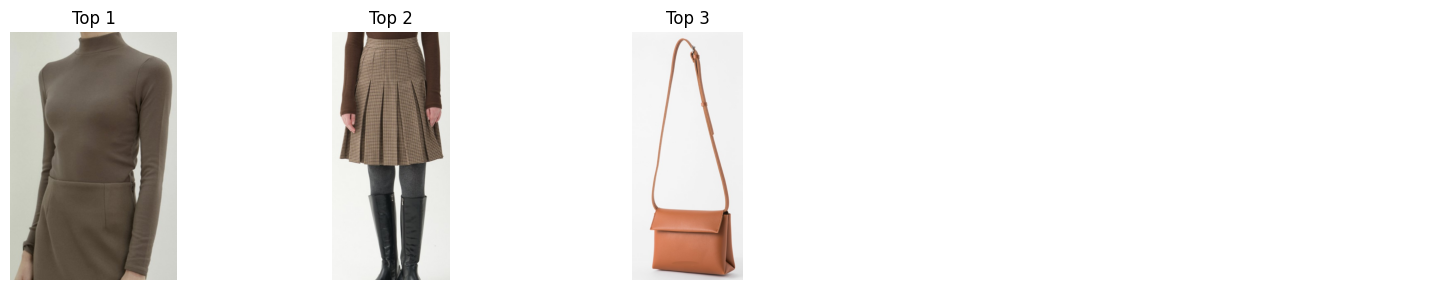

In [ ]:
recommend_indices = []
for feature in maje_style_features2:
    feature_reshaped = feature.reshape(1, -1)
    indices = sim.get_sim(feature_reshaped, k=1)
    recommend_indices.extend(indices)

print("추천 결과:", recommend_indices)
Dataset.show_images(recommend_indices)